# Applying Convolutional Neural Network(CNN) to an image

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [2]:
plt.rc('figure', autolayout=True)
# .rc is used to configure default styles for matplotlib
# colormap means what colors to use when displaying images
# here we set the default colormap to 'magma', a perceptually uniform colormap
plt.rc('image', cmap='magma')

kernel = tf.constant([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])

image = tf.io.read_file('Ganesh.jpg')
# Read the image file
# Decode the image to a tensor, specifying 1 channel for grayscale
# what is the channel parameter here?
# channels=1 means we want to decode the image as a grayscale image
# if channels=3, it would be decoded as an RGB image
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

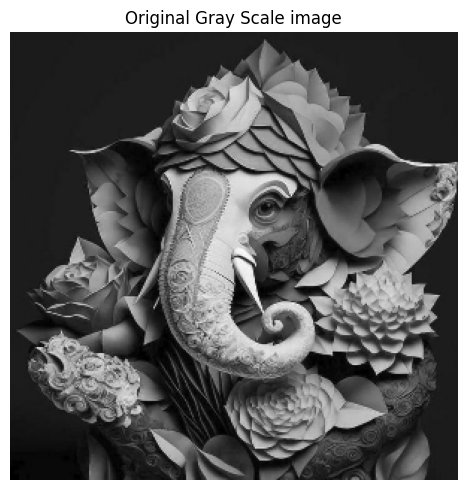

In [3]:
# squeeze removes dimensions of size 1 from the shape of a tensor
# here it removes the channel dimension since it's 1 (grayscale)
# convert the tensor to a numpy array for plotting
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()



In [5]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# what is this cell doing?
# applying convolution operation on the image using the defined kernel

In [11]:
conv_fn = tf.nn.conv2d

# conv2d expects strides as a 4-element list: [1, stride_h, stride_w, 1]
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=[1, 1, 1, 1],
    padding='SAME',
)

# convert result to numpy and plot
filtered = tf.squeeze(image_filter).numpy()
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(filtered, cmap='gray')
plt.axis('off')
plt.title('Filtered image')
plt.show()

InvalidArgumentError: {{function_node __wrapped____MklNativeConv2D_device_/job:localhost/replica:0/task:0/device:CPU:0}} filter must be 4-dimensional: [3,3,1,1,1,1] [Op:Conv2D] name: 